In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
os.listdir('.')
# os.chdir('drive/My Drive/Colab_Test/Dataset/Regression')

In [8]:
dataset = pd.read_csv('auto.csv')
dataset.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [9]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16   engine-size       205 non

**Data Cleaning**

In [11]:
# Replace '?' dengan NaN

dataset.replace("?", np.nan, inplace=True)

In [12]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [14]:
  dataset.isnull().sum().sort_values(ascending=False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          2
length                0
make                  0
fuel-type             0
aspiration            0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
height                0
width                 0
highway-mpg           0
curb-weight           0
engine-type           0
num-of-cylinders      0
 engine-size          0
fuel-system           0
compression-ratio     0
city-mpg              0
symboling             0
dtype: int64

In [19]:
avg_norm_loss = dataset['normalized-losses'].astype('float').mean(axis=0)
avg_stroke = dataset['stroke'].astype('float').mean(axis=0)
avg_bore = dataset['bore'].astype('float').mean(axis=0)
avg_peak_rpm = dataset['peak-rpm'].astype('float').mean(axis=0)
avg_horsepower = dataset['horsepower'].astype('float').mean(axis=0)

# avg_norm_loss
# avg_stroke
# avg_bore
# avg_peak_rpm
# avg_horsepower

104.25615763546799

In [22]:
# Memasukan angka diatas kedalam table (array)
# replace(yang diganti, angkanya dari mana, hyperparameter)
dataset['normalized-losses'].replace(np.nan, avg_norm_loss,inplace=True)
dataset['stroke'].replace(np.nan, avg_stroke,inplace=True)
dataset['bore'].replace(np.nan, avg_bore,inplace=True)
dataset['peak-rpm'].replace(np.nan, avg_peak_rpm,inplace=True)
dataset['horsepower'].replace(np.nan, avg_horsepower,inplace=True)

dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [25]:
dataset['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [28]:
# Karena paling banyak angka 4, jadi dimasukan angka 4 ke 2 data yang kososng
dataset['num-of-doors'].replace(np.nan, 'four', inplace=True)

dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [31]:
# Karena price tidak mungkin sama dan tidak mungkin diambil jadi rata-rata, maka 4 data yang kosong di hapus
dataset.dropna(subset=['price'], axis = 0, inplace=True)
dataset.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
 engine-size         0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [32]:
dataset.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [39]:
# Merubah objek jadi string
dataset[['bore', 'stroke', 'price', 'peak-rpm']] = dataset[['bore', 'stroke', 'price', 'peak-rpm']].astype(float) # Karena format data sudah float
dataset[['normalized-losses', 'horsepower']] = dataset[[ 'normalized-losses', 'horsepower']].astype(int) # Karena format data string
dataset.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
 engine-size           int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [40]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2251b15668>,
      dtype=object)

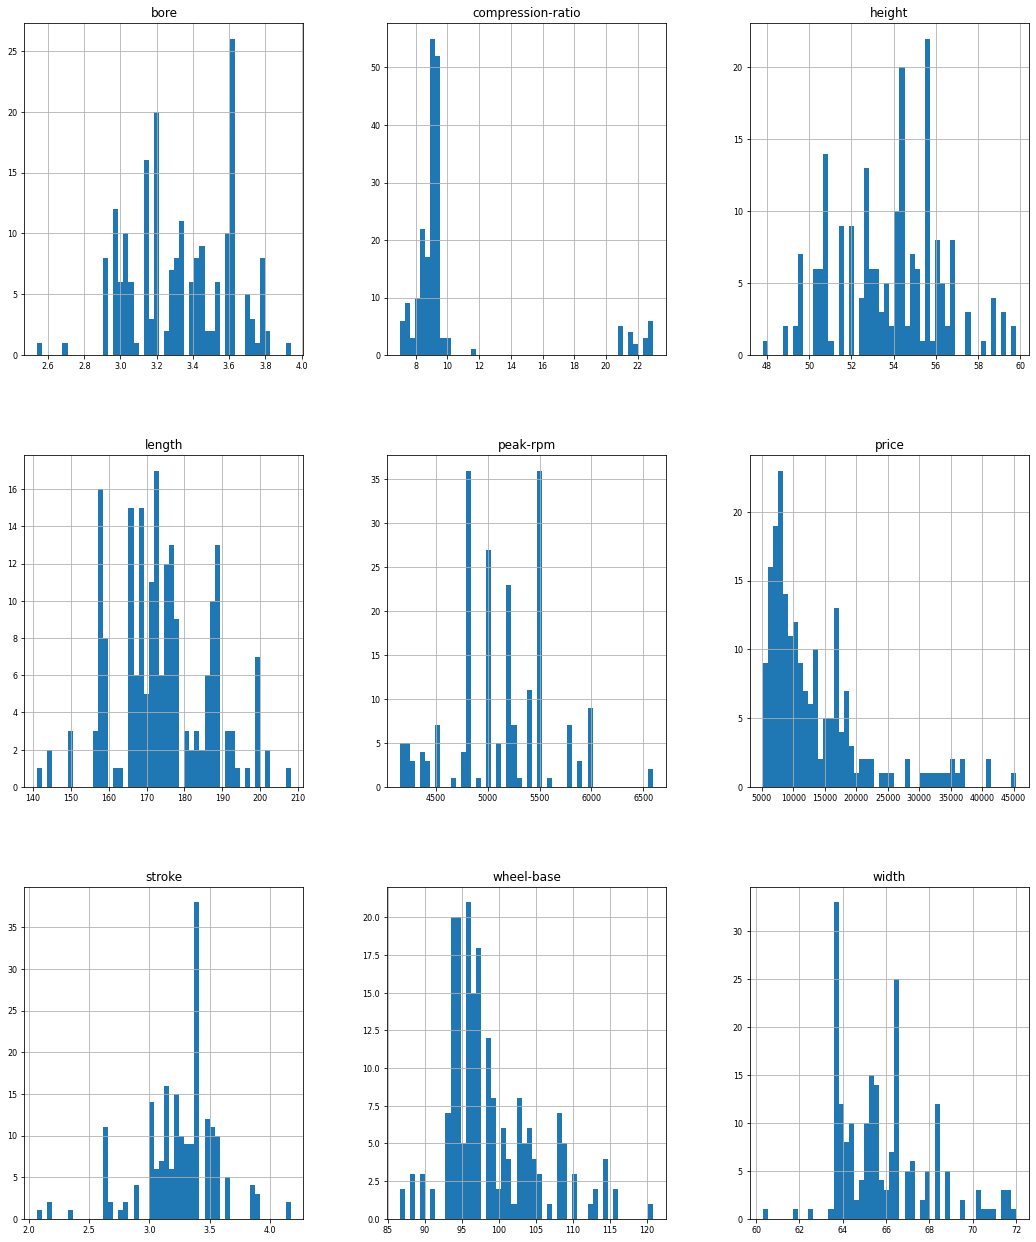

In [42]:
dataset_numbers = dataset.select_dtypes(include=('float64'))

dataset_numbers.hist(figsize=(18, 22), bins = 50, xlabelsize=8, ylabelsize=8)

In [44]:
# Feature Engineering

# Dirubah ke L/100km karena agar kita lebih paham membacanya

dataset['city-L/100km'] = 235 / dataset['city-mpg']
dataset['highway-L/100km'] = 235 / dataset['highway-mpg']

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [45]:
dataset.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [46]:
# Karena horsepower dapat dibedakan dari angka diatas, makanya dibedakan menjadi beberapa bagian

print(min(dataset['horsepower']), max(dataset['horsepower']))

48 262


In [47]:
bins = np.linspace(min(dataset['horsepower']), max(dataset['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [49]:
group_names = ['horspower-low', 'horsepower-medium', 'horsepower-high']

dataset['horsepower-categroies'] = pd.cut(dataset['horsepower'], bins, labels=group_names, include_lowest=True)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categroies
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horspower-low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horspower-low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horspower-low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horspower-low


In [50]:
# One-hot encoding (merubah menjadi nilai biner, yaitu 0 dan 1)

dataset['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [51]:
# Dibikin kayak gini karena gk bisa nentuin 1 dan 2 karena, gk bisa dibilang diesel lebih baik dari gas, atau sebaliknya
fuel_categorized = pd.get_dummies(dataset['fuel-type'])
fuel_categorized

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [52]:
dataset = pd.concat([dataset, fuel_categorized], axis = 1)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categroies,diesel,gas
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horspower-low,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horspower-low,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horspower-low,0,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horspower-low,0,1


In [54]:
make_categorized = pd.get_dummies(dataset['make'])
make_categorized

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
dataset = pd.concat([dataset, make_categorized], axis = 1)

dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categroies,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horspower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horspower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horspower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horspower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
cleanup_nums = {
    'num-of-doors' : {
        'four' : 4,
        'two' : 2
    },
    'num-of-cylinders' : {
        'four' : 4,
        'six' : 6,
        'five' : 5, 
        'eight' : 8,
        'two' : 2,
        'twelve' : 12,
        'three' : 3
    }
}

dataset.replace(cleanup_nums, inplace=True)
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categroies,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horspower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horspower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horspower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horspower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
dataset.dtypes

symboling                   int64
normalized-losses           int64
make                       object
fuel-type                  object
aspiration                 object
num-of-doors                int64
body-style                 object
drive-wheels               object
engine-location            object
wheel-base                float64
length                    float64
width                     float64
height                    float64
curb-weight                 int64
engine-type                object
num-of-cylinders            int64
 engine-size                int64
fuel-system                object
bore                      float64
stroke                    float64
compression-ratio         float64
horsepower                  int64
peak-rpm                  float64
city-mpg                    int64
highway-mpg                 int64
price                     float64
city-L/100km              float64
highway-L/100km           float64
horsepower-categroies    category
diesel        

In [62]:
# Aspiration
aspiration_categorized = pd.get_dummies(dataset['aspiration'])
dataset = pd.concat([dataset, aspiration_categorized], axis = 1)

# Body-style
body_style_categorized = pd.get_dummies(dataset['body-style'])
dataset = pd.concat([dataset, body_style_categorized], axis = 1)

# drive-wheels
drive_wheels_categorized = pd.get_dummies(dataset['drive-wheels'])
dataset = pd.concat([dataset, drive_wheels_categorized], axis = 1)

# engine-location
engine_location_categorized = pd.get_dummies(dataset['engine-location'])
dataset = pd.concat([dataset, engine_location_categorized], axis = 1)

# engine-type
engine_type_categorized = pd.get_dummies(dataset['engine-type'])
dataset = pd.concat([dataset, engine_type_categorized], axis = 1)

# fuel-system
fuel_system_categorized = pd.get_dummies(dataset['fuel-system'])
dataset = pd.concat([dataset, fuel_system_categorized], axis = 1)

In [63]:
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categroies,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,front,rear,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,dohc,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horspower-low,0,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,122,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horspower-low,0,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,122,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium,0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horspower-low,0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horspower-low,0,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [64]:
dataset.drop(['make','fuel-type', 'aspiration',  'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'fuel-system'], axis = 1, inplace= True)

In [65]:
dataset.head()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-categroies,diesel,gas,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,...,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,front,rear,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,fwd,rwd,front,rear,dohc,l,ohc,ohcf,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,horspower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,122,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,horspower-low,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,122,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,horsepower-medium,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,164,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,horspower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,164,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,horspower-low,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 87 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   symboling              201 non-null    int64   
 1   normalized-losses      201 non-null    int64   
 2   num-of-doors           201 non-null    int64   
 3   wheel-base             201 non-null    float64 
 4   length                 201 non-null    float64 
 5   width                  201 non-null    float64 
 6   height                 201 non-null    float64 
 7   curb-weight            201 non-null    int64   
 8   num-of-cylinders       201 non-null    int64   
 9    engine-size           201 non-null    int64   
 10  bore                   201 non-null    float64 
 11  stroke                 201 non-null    float64 
 12  compression-ratio      201 non-null    float64 
 13  horsepower             201 non-null    int64   
 14  peak-rpm               201 non-null    flo

**EDA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f224de2ba20>,
      dtype=object)

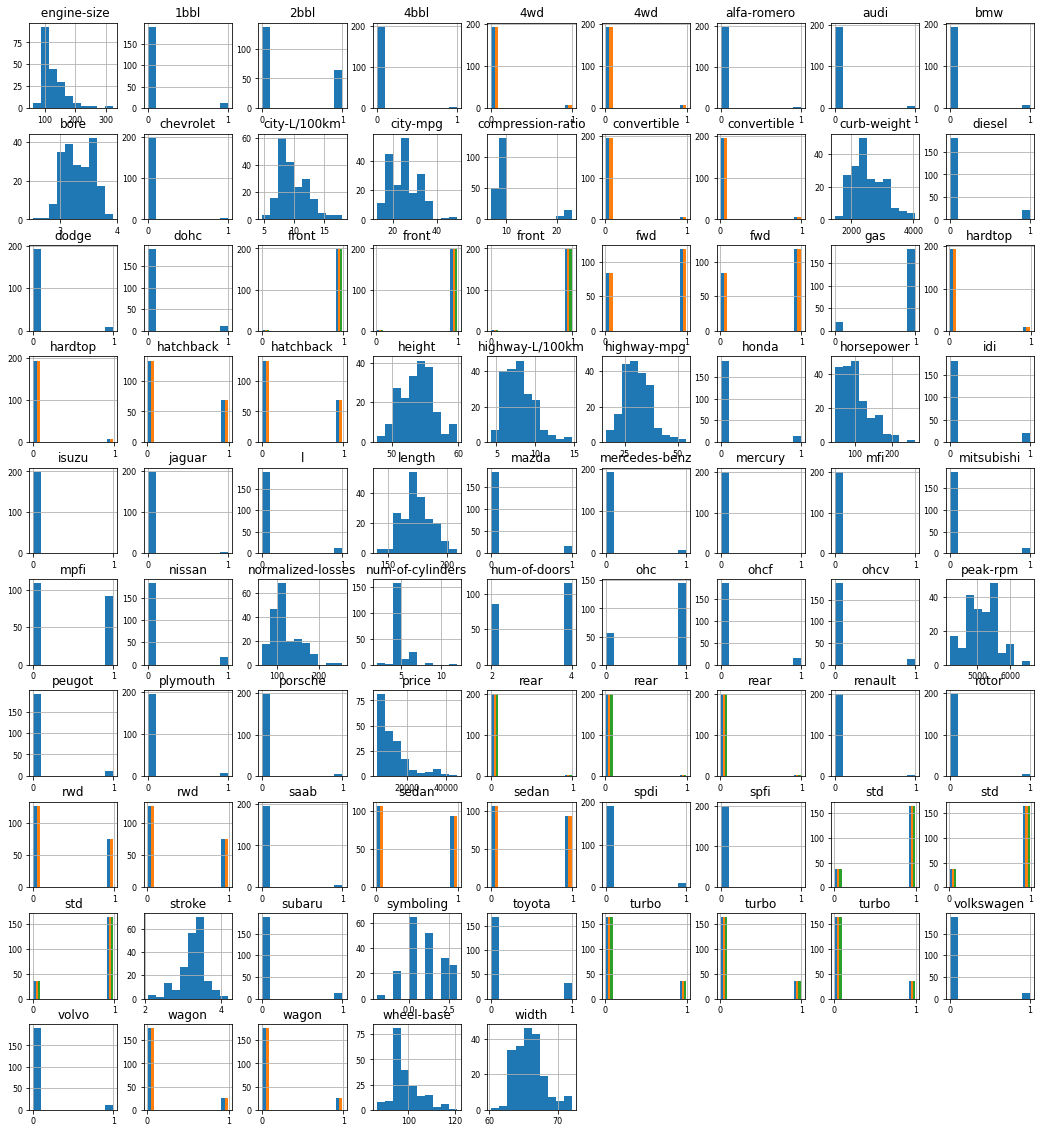

In [69]:
dataset.hist(figsize=(18,20), bins=10, xlabelsize=8, ylabelsize=8)

**Machine Learning**

**1. Transform Preprocessing**

In [75]:
# Karena yg di proses hanya int dan float, maka kategori dihapus

dataset.drop(['horsepower-categroies'], axis = 1, inplace= True)

In [76]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [77]:
label = dataset['price']
features = dataset.drop(['price'], axis = 1)

In [80]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, RobustScaler, MaxAbsScaler
pre_proc = [StandardScaler(), PowerTransformer(method='yeo-johnson', standardize = True), QuantileTransformer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]

for proc in pre_proc : 
  scaler = proc
  feature_scaled = scaler.fit_transform(features.values)
  label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

  from sklearn.model_selection import train_test_split
  feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)

  linear_reg = LinearRegression()

  linear_reg.fit(feature_train, label_train)
  predictions = linear_reg.predict(feature_test)
  
  mse = round(mean_squared_error(label_test, predictions),10)
  mae = round(mean_absolute_error(label_test, predictions),10)
  r2 = round(r2_score(label_test, predictions),10)
  rmse = round(np.sqrt(mean_squared_error(label_test, predictions)),10)

  text = str(proc)
  text1 = text.split('(')[0]


  print(f"Preprocessing dengan model      -> {text1}")
  print(f"MSE (Mean Squared Error)        : {mse}")
  print(f"MAE (Mean Absolute Error)       : {mae}")
  print(f"r^2 score                       : {r2}")
  print(f'RMSE (Root Mean Squared Error)  : {rmse}\n')

Preprocessing dengan model      -> StandardScaler
MSE (Mean Squared Error)        : 0.0769491091
MAE (Mean Absolute Error)       : 0.2071706145
r^2 score                       : 0.8861138769
RMSE (Root Mean Squared Error)  : 0.2773970242

Preprocessing dengan model      -> PowerTransformer
MSE (Mean Squared Error)        : 0.0
MAE (Mean Absolute Error)       : 0.0
r^2 score                       : 1.0
RMSE (Root Mean Squared Error)  : 0.0

Preprocessing dengan model      -> QuantileTransformer
MSE (Mean Squared Error)        : 2.7890517128242794e+20
MAE (Mean Absolute Error)       : 3014878321.2217097
r^2 score                       : -3.511566471121275e+21
RMSE (Root Mean Squared Error)  : 16700454223.835588

Preprocessing dengan model      -> MinMaxScaler
MSE (Mean Squared Error)        : 0.0029695449
MAE (Mean Absolute Error)       : 0.040585035
r^2 score                       : 0.8865168076
RMSE (Root Mean Squared Error)  : 0.0544935308

Preprocessing dengan model      -> MaxAbsSca

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


**Untuk Metode Box-Cox, tidak digunakan karena Box-Cox hanya akan menjalankan apabila dataset tidak ada angka 0. Jadi apabila di jalankan pada case ini, Box-Cox akan error.**

**Dari penggunaan scaler diatas, didapatkan StandardScaler dengan metode adalah yang terbaik untuk digunakan dalam kasus ini, karena apabila digunakan Yeo-Johnson, maka terjadi ketidak wajaran pada hasil r2.**

**2. Masukan kedalam Algoritma**

In [89]:
from sklearn import preprocessing
# scaler = preprocessing.PowerTransformer(method='yeo-johnson')
scaler = preprocessing.StandardScaler()

features_scaled = scaler.fit_transform(features.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features_scaled, label_scaled, test_size=0.25, random_state=10)

# print(label_scaled)

In [90]:
for i in range(10, 501, 20) :
  print("Random Forest Regressor, dengan n_estimators = ",i)
  forest_reg = RandomForestRegressor(n_estimators=i, random_state=10, max_features='log2')
  forest_reg.fit(feature_train, label_train)
  predictions = forest_reg.predict(feature_test)
  print(f"r^2 score Random Forest Regressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) Random Forest Regressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')

Random Forest Regressor, dengan n_estimators =  10
r^2 score Random Forest Regressor                       : 0.9025742365294718
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.25656848055349885

Random Forest Regressor, dengan n_estimators =  30
r^2 score Random Forest Regressor                       : 0.9091872271384935
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.24770790233835843

Random Forest Regressor, dengan n_estimators =  50
r^2 score Random Forest Regressor                       : 0.9197993201233589
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.23278522838725832

Random Forest Regressor, dengan n_estimators =  70
r^2 score Random Forest Regressor                       : 0.9194606423236655
RMSE (Root Mean Squared Error) Random Forest Regressor  : 0.23327622255496736

Random Forest Regressor, dengan n_estimators =  90
r^2 score Random Forest Regressor                       : 0.9286268551794603
RMSE (Root Mean Squared Error) Random Forest

In [91]:
for i in range(1, 501, 5) :
  print("XGBRegressor, dengan n_estimators = ",i)
  xg_reg = xgb.XGBRegressor(objective='reg:linear', n_estimators=i)
  xg_reg.fit(feature_train, label_train)
  predictions = xg_reg.predict(feature_test)
  print(f"r^2 score XGBRegressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) XGBRegressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')

XGBRegressor, dengan n_estimators =  1
[13:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : -0.22306010668574427
RMSE (Root Mean Squared Error) XGBRegressor  : 0.9090552801269801

XGBRegressor, dengan n_estimators =  6
[13:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : 0.5004940228541208
RMSE (Root Mean Squared Error) XGBRegressor  : 0.5809473005391984

XGBRegressor, dengan n_estimators =  11
[13:44:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r^2 score XGBRegressor                       : 0.7462358591480469
RMSE (Root Mean Squared Error) XGBRegressor  : 0.4140773921843433

XGBRegressor, dengan n_estimators =  16
[13:44:01] WARNING: /workspace/src/objective/regression_obj.

In [92]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

for i in kernel :
  print("SVR, dengan n_estimators = ",i)
  svr_reg = SVR(kernel = i,C=1.0, epsilon=0.2)
  svr_reg.fit(feature_train, label_train)
  predictions = svr_reg.predict(feature_test)
  print(f"r^2 score SVR                      : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) SVR : {np.sqrt(mean_squared_error(label_test, predictions))}\n')


SVR, dengan n_estimators =  linear
r^2 score SVR                      : 0.87396597050114
RMSE (Root Mean Squared Error) SVR : 0.29181680895130707

SVR, dengan n_estimators =  poly
r^2 score SVR                      : 0.7849862670006167
RMSE (Root Mean Squared Error) SVR : 0.3811531321763176

SVR, dengan n_estimators =  rbf
r^2 score SVR                      : 0.7774308407207874
RMSE (Root Mean Squared Error) SVR : 0.38779203614547164

SVR, dengan n_estimators =  sigmoid
r^2 score SVR                      : 0.5985188697757502
RMSE (Root Mean Squared Error) SVR : 0.5208335624736589



In [93]:
for i in range(1, 301, 5) :
  print("KNN Regressor, dengan n_neighbors = ",i)
  knn_reg = KNeighborsRegressor(n_neighbors=1)
  knn_reg.fit(feature_train, label_train)
  predictions = knn_reg.predict(feature_test)
  print(f"r^2 score KNN Regressor                       : {r2_score(label_test, predictions)}")
  print(f'RMSE (Root Mean Squared Error) KNN Regressor  : {np.sqrt(mean_squared_error(label_test, predictions))}\n')



KNN Regressor, dengan n_neighbors =  1
r^2 score KNN Regressor                       : 0.7457978398680384
RMSE (Root Mean Squared Error) KNN Regressor  : 0.41443460514838

KNN Regressor, dengan n_neighbors =  6
r^2 score KNN Regressor                       : 0.7457978398680384
RMSE (Root Mean Squared Error) KNN Regressor  : 0.41443460514838

KNN Regressor, dengan n_neighbors =  11
r^2 score KNN Regressor                       : 0.7457978398680384
RMSE (Root Mean Squared Error) KNN Regressor  : 0.41443460514838

KNN Regressor, dengan n_neighbors =  16
r^2 score KNN Regressor                       : 0.7457978398680384
RMSE (Root Mean Squared Error) KNN Regressor  : 0.41443460514838

KNN Regressor, dengan n_neighbors =  21
r^2 score KNN Regressor                       : 0.7457978398680384
RMSE (Root Mean Squared Error) KNN Regressor  : 0.41443460514838

KNN Regressor, dengan n_neighbors =  26
r^2 score KNN Regressor                       : 0.7457978398680384
RMSE (Root Mean Squared Error)

**Dari pengujian diatas didapatkan r2 terbesar adalah 0.9355 dan rmse terbesar adalah 0.2087.
Angka diatas didapatkan dari Random Forest Regressor dengan n_estimators 310.** 